The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!


 The gender with the most Nobel laureates is : Male
 The most common birth country of Nobel laureates is : United States of America

 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.

 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


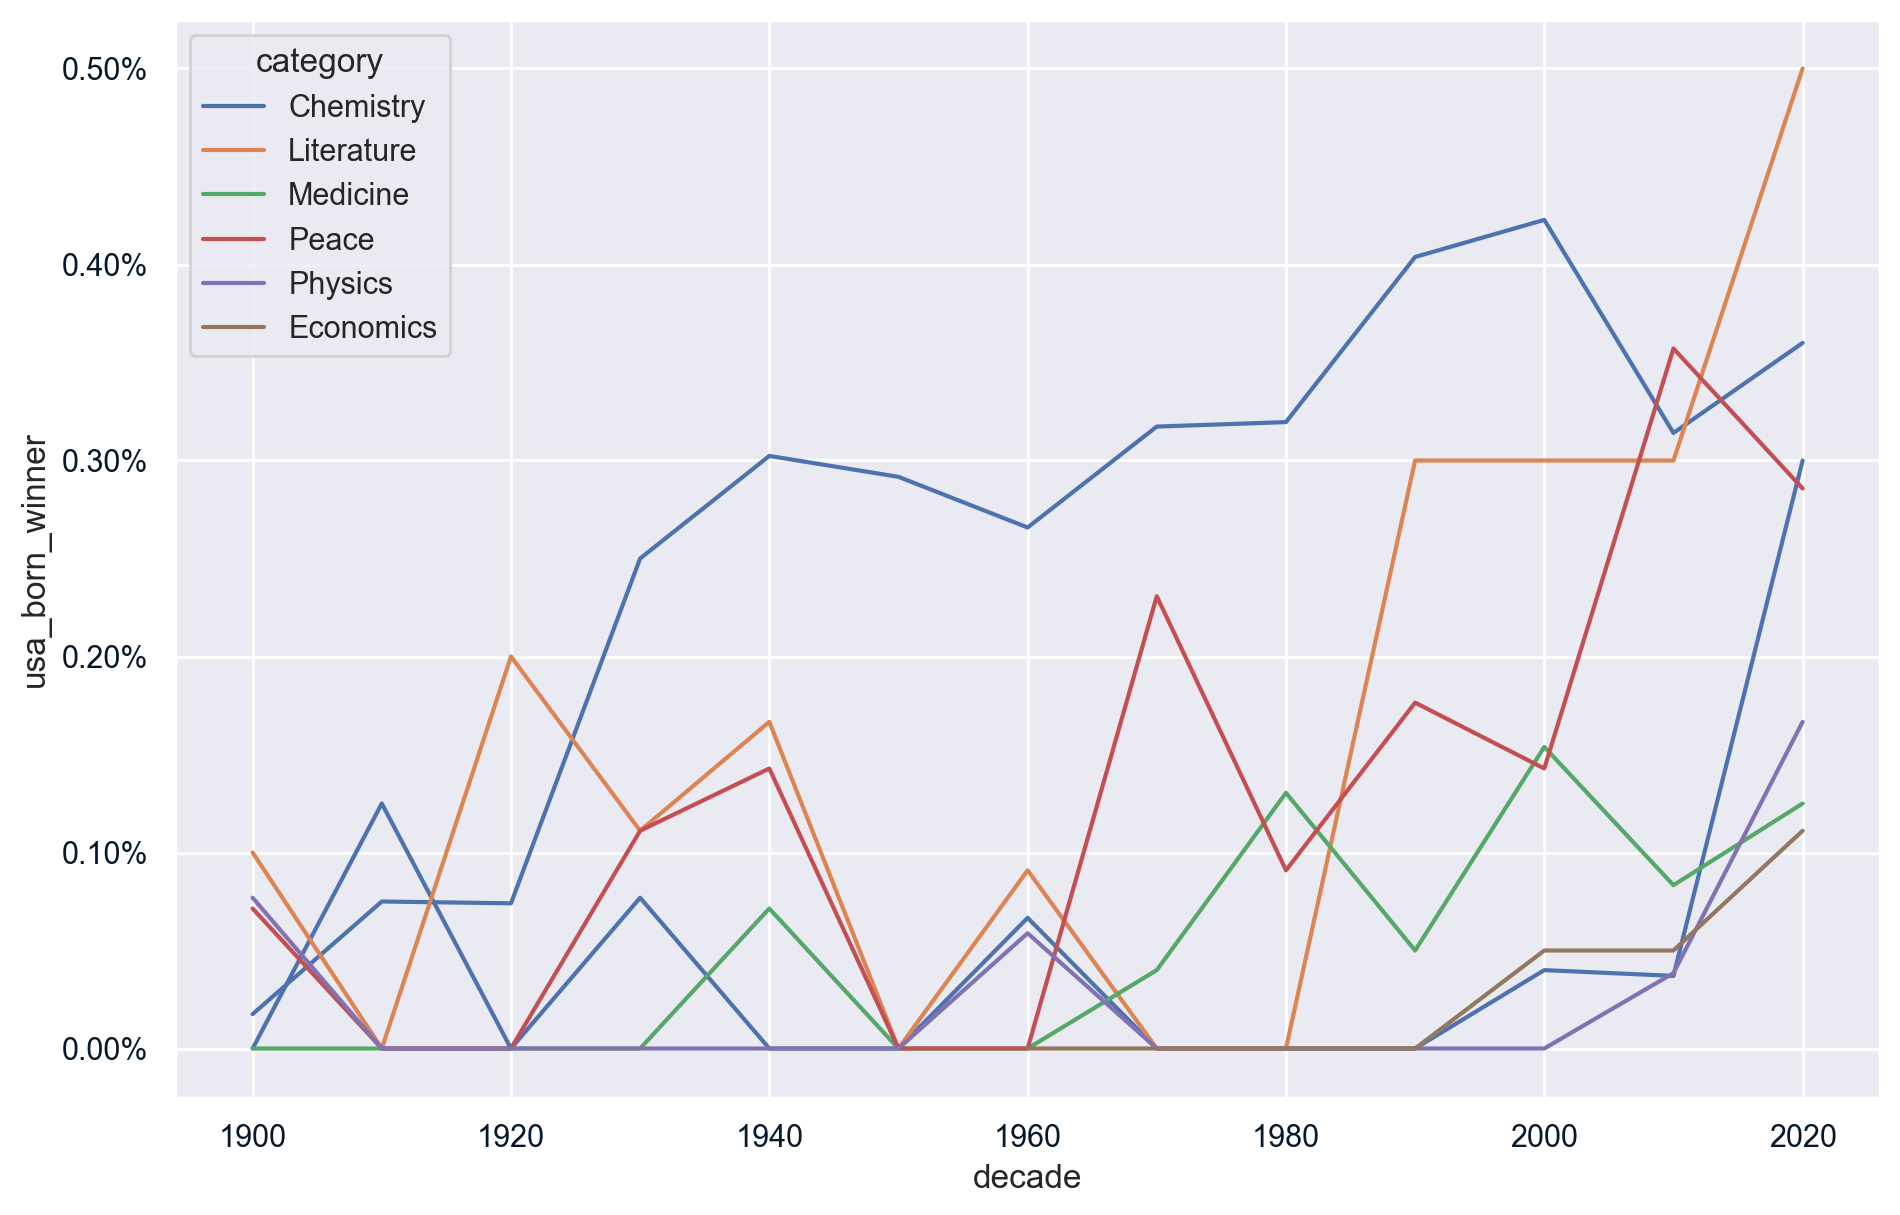

In [25]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!
# Load the dataset and find the most common gender and birth country
##Load the dataset
nobel = pd.read_csv('data/nobel.csv')

##Display the number of prizes won by male and female recipients.
#display(nobel['sex'].value_counts())

# Store and display the most commonly awarded gender and birth country in requested variables
top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]

print("\n The gender with the most Nobel laureates is :", top_gender)
print(" The most common birth country of Nobel laureates is :", top_country)


##Display the number of prizes won by the top 10 nationalities.
nobel['birth_country'].value_counts().head(n=10)

# Identify the decade with the highest ratio of US-born winners
##Create the US-born winners column
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'

##Create the decade column
nobel['decade'] = np.floor(nobel['year'].astype('int')/10).astype('int')*10

##Finding the ration
prop_usa_winners = nobel.groupby(by=['decade'], as_index=False)['usa_born_winner'].mean()

##Identify the decade with the highest ratio of US-born winners
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]

##Create a relational line plot
###Setting the plotting theme
sns.set()
###and setting the size of all plots.

plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x='decade', y='usa_born_winner', data=prop_usa_winners)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())

# Find the decade and category with the highest proportion of female laureates
##Filtering for female winners
nobel['female_winner'] = nobel['sex'] == 'Female'

##Group by two columns
##Find the decade and category with the highest female winners
#prop_female_winners = nobel.groupby(by=['decade','category'], as_index=False)['female_winner'].max()
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}

##Create a relational line plot with multiple categories
ax =sns.lineplot(x='decade', y='female_winner', data=prop_female_winners, hue='category')

### Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())

# Find first woman to win a Nobel Prize
##Filter a DataFrame 
##Find the minimum value in a column
#nobel[nobel['female_winner']].nsmallest(n=1, columns=['year'])
nobel_women = nobel[nobel['female_winner']]
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")


# Determine repeat winners
##Count the values in a column
##Finding counts of two or more
counts = nobel['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list=list(repeats)
print("\n The repeat winners are :", repeat_list)